
## Word Embeddings and text Classification


### Model Preprocessing

### Part 1: Text Data Preparation

a) Read the Text Data, Lowercasing, and Exploratory Data Analysis (EDA)
Objective:

The goal is to load the dataset, preprocess the text, and perform an initial analysis to understand the data distribution.
Steps:

Loading the Data: Use gdown to load the dataset directly from Google Drive into the environment.
Lowercasing: Convert all text to lowercase to ensure uniformity and avoid treating the same words in different cases as different tokens.
Generate basic statistical summaries (word count, sentence length).
Visualize data distributions using histograms and bar plots.
Generate word clouds for visual insights into the most common words.

b) Tokenization, Encoding, and Text Vectorization
Objective:

Convert the text data into numerical representations suitable for machine learning models.
Key Concepts:

Tokenization: Splits text into individual words or subwords (called tokens).
Encoding: Converts tokens into integer indices.

c) Extract Features and Labels

Extract the features (X) and labels (y) from the processed data.
Details:

Features (X): The tokenized and vectorized sequences representing the text data.
Labels (y): The target categories (e.g., genres or classes) encoded into one-hot vectors or integers for classification.

In [1]:
!python -m spacy download en_core_web_lg


     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.3/400.7 MB ? eta -:--:--
     ---------------------------------------- 1.8/400.7 MB 7.2 MB/s eta 0:00:56
     ---------------------------------------- 3.4/400.7 MB 8.0 MB/s eta 0:00:50
     ---------------------------------------- 3.4/400.7 MB 8.0 MB/s eta 0:00:50
     ---------------------------------------- 4.5/400.7 MB 5.3 MB/s eta 0:01:16
      --------------------------------------- 5.5/400.7 MB 5.1 MB/s eta 0:01:18
      --------------------------------------- 7.1/400.7 MB 5.5 MB/s eta 0:01:13
      --------------------------------------- 7.6/400.7 MB 5.4 MB/s eta 0:01:13
      --------------------------------------- 9.2/400.7 MB 5.5 MB/s eta 0:01:11
      -------------------------------------- 10.0/400.7 MB 5.3 MB/s eta 0:01:15
     - ------------------------------------- 10.7/400.7 MB 5.0 MB/s eta 0:01:18
     - ------------------------------------- 11.3/400.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.metrics.aline import feature_matrix
from pyexpat import features
%matplotlib inline
import itertools
import warnings
# from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
import re
import nltk
import spacy
nlp = spacy.load("en_core_web_lg")
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import CosineSimilarity
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import SGD
from imblearn.over_sampling import SMOTE
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import gdown

url = "https://drive.google.com/uc?id=10Ka12eC8icg0kiQGL2YUGeUctxD-BeuY"
output = "dataset.csv"
gdown.download(url, output, quiet=False)


df = pd.read_csv(output)

# Lowercase and EDA
df['Overview'] = df['Overview'].apply(lambda x: x.lower())
df['Genre'] = df['Genre'].apply(lambda x: x.lower())
df.head()

Downloading...
From: https://drive.google.com/uc?id=10Ka12eC8icg0kiQGL2YUGeUctxD-BeuY
To: c:\Users\USER\OneDrive\Desktop\python\sem2\git\Movie_Genre\dataset.csv
100%|██████████| 157k/157k [00:00<00:00, 747kB/s]


,Genre,Overview
0,drama,two imprisoned men bond over a number of years...
1,crime,an organized crime dynasty's aging patriarch t...
2,action,when the menace known as the joker wreaks havo...
3,crime,the early life and career of vito corleone in ...
4,crime,a jury holdout attempts to prevent a miscarria...


In [7]:
df.describe()

,Genre,Overview
count,1000,1000
unique,14,1000
top,drama,two imprisoned men bond over a number of years...
freq,289,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genre     1000 non-null   object
 1   Overview  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [19]:
df['Genre'].value_counts()

Genre
drama        289
action       172
comedy       155
crime        107
biography     88
animation     82
adventure     72
mystery       12
horror        11
western        4
film-noir      3
fantasy        2
family         2
thriller       1
Name: count, dtype: int64

## Data Analysis

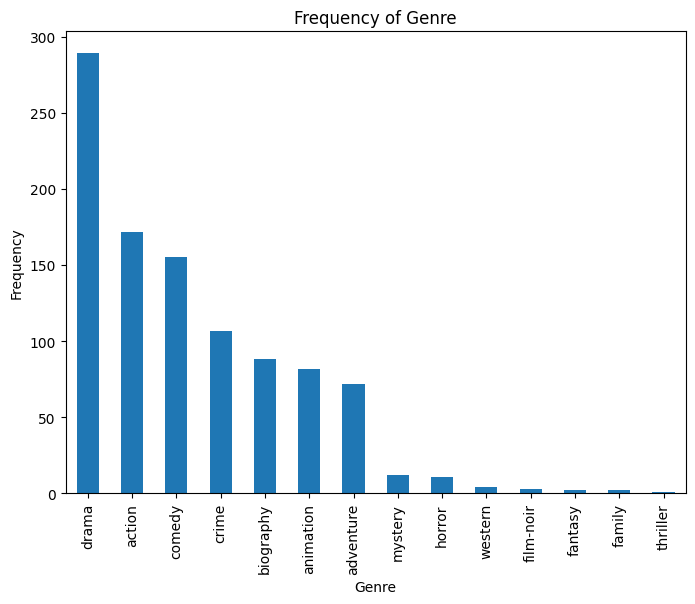

In [9]:
plt.figure(figsize=(8, 6))
df['Genre'].value_counts().plot(kind='bar')
plt.title("Frequency of Genre")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [45]:
def get_first_100_rows_per_label(df):
    """
    Get the first 100 rows for each label in the 'labels' column of a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame. It must have a column named 'labels'.

    Returns:
        pd.DataFrame: A new DataFrame containing the first 100 rows for each label.
    """
    return df.groupby('Genre').head(100)

In [46]:
newDF = get_first_100_rows_per_label(df)


In [47]:
newDF.head()

,Genre,Overview
0,drama,two imprisoned men bond over a number of years...
1,crime,an organized crime dynasty's aging patriarch t...
2,action,when the menace known as the joker wreaks havo...
3,crime,the early life and career of vito corleone in ...
4,crime,a jury holdout attempts to prevent a miscarria...


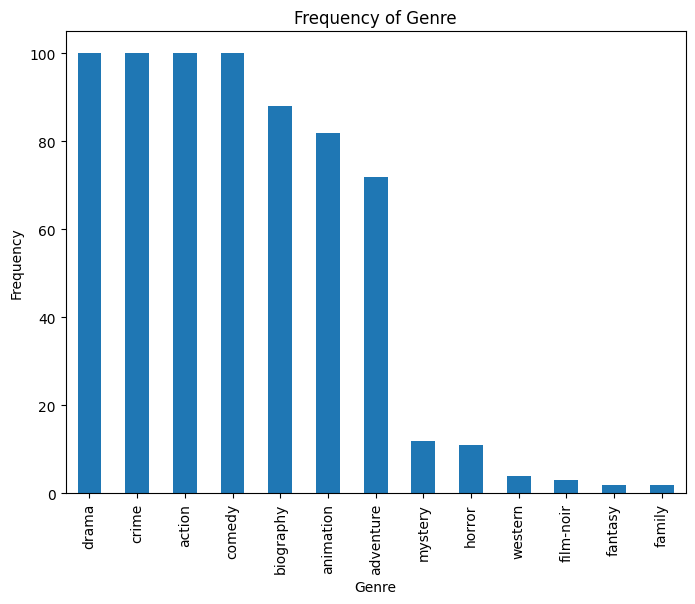

In [48]:
plt.figure(figsize=(8, 6))
newDF['Genre'].value_counts().plot(kind='bar')
plt.title("Frequency of Genre")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [49]:
df = get_first_100_rows_per_label(df)

In [50]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['one', 'two', 'go','goes', 'get', 'also', 'however', 'tells']
stopwords_list += [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', ' ', text)
    text = text.strip(' ')
    text = word_tokenize(text)
    text = ' '.join(text)
    text = nlp(text)
    text = [w.lemma_ for w in text]
    text = [w for w in text if w not in stopwords_list]
    text = ' '.join(text)
    return text

In [52]:
print('Text before cleaning: ' + df['Overview'][5])
new_df = df.copy(deep=True)
new_df['Overview'] = new_df['Overview'].apply(lambda x: clean_text(x))
print('Text after cleaning: ' + new_df['Overview'][5])

Text before cleaning: gandalf and aragorn lead the world of men against sauron's army to draw his gaze from frodo and sam as they approach mount doom with the one ring.
Text after cleaning: gandalf aragorn lead world man sauron army draw gaze frodo sam approach mount doom ring


## Frequency distribution visualization for top 2 and smallest genre

### Drama word frequency distribution

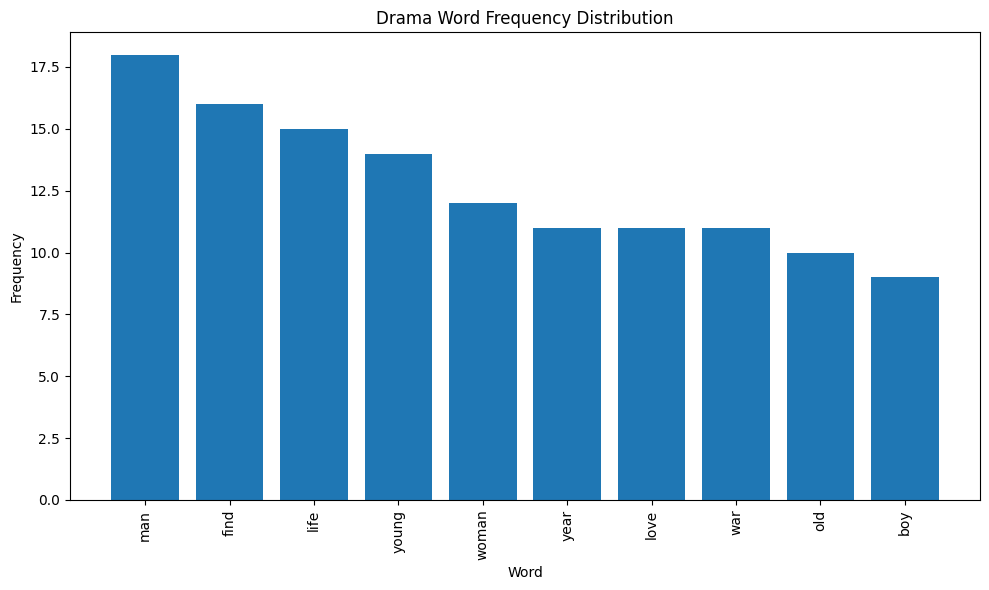

In [53]:
drama_overview = new_df.loc[new_df['Genre'] == 'drama', ['Overview']]
word_freq = Counter([token for text in drama_overview['Overview'] for token in text.split()])

plt.figure(figsize=(10, 6))
word_freq.most_common(10)
plt.bar([word for word, freq in word_freq.most_common(10)], [freq for word, freq in word_freq.most_common(10)])
plt.title('Drama Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Crime word frequency distribution

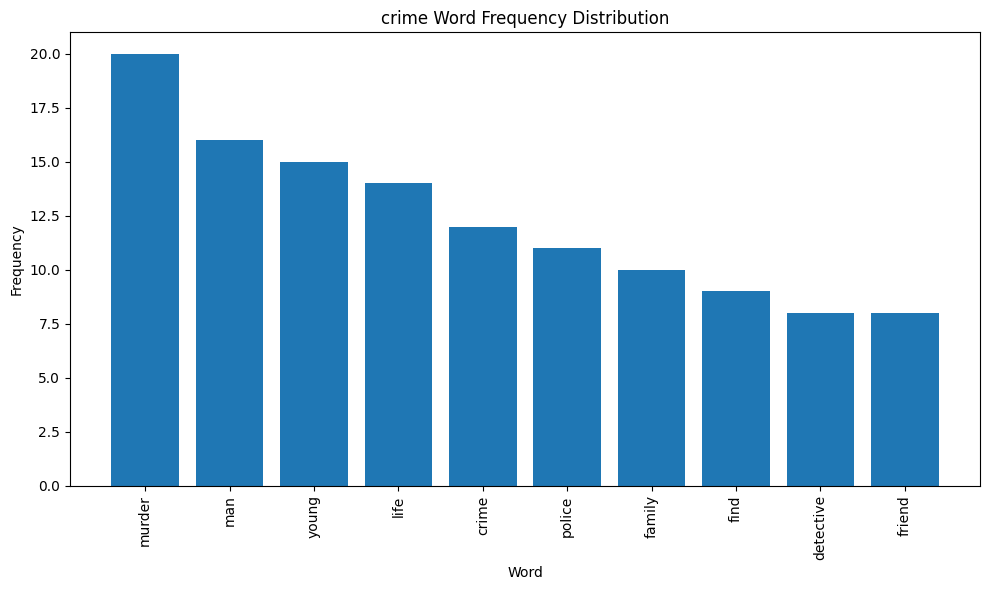

In [54]:
crime_overview = new_df.loc[new_df['Genre'] == 'crime', ['Overview']]
word_freq = Counter([token for text in crime_overview['Overview'] for token in text.split()])

plt.figure(figsize=(10, 6))
word_freq.most_common(10)
plt.bar([word for word, freq in word_freq.most_common(10)], [freq for word, freq in word_freq.most_common(10)])
plt.title('crime Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Family word frequency distribution

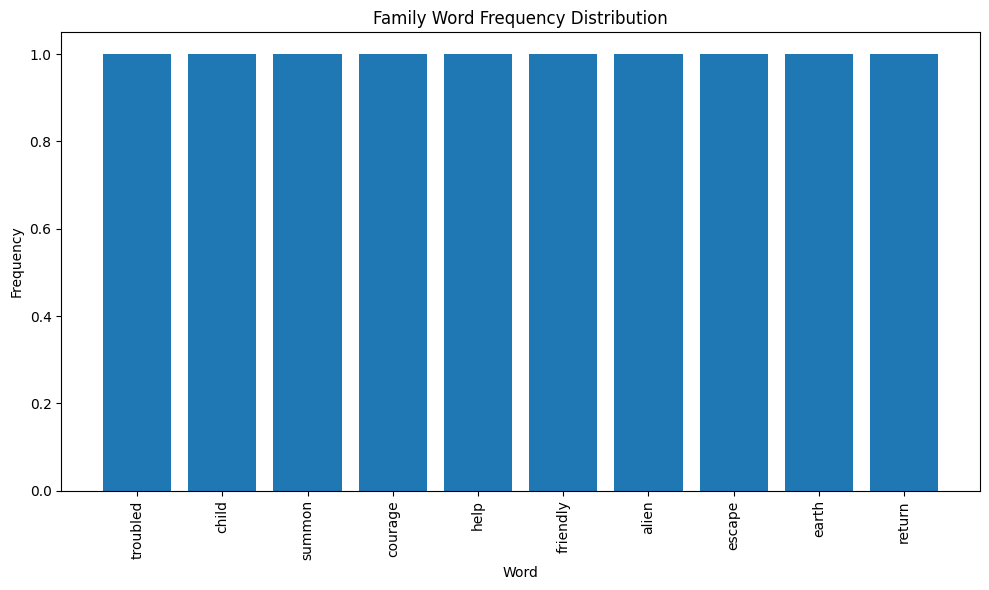

In [55]:
family_overview = new_df.loc[new_df['Genre'] == 'family', ['Overview']]
word_freq = Counter([token for text in family_overview['Overview'] for token in text.split()])

plt.figure(figsize=(10, 6))
word_freq.most_common(10)
plt.bar([word for word, freq in word_freq.most_common(10)], [freq for word, freq in word_freq.most_common(10)])
plt.title('Family Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Word cloud  representation for most used words in drama

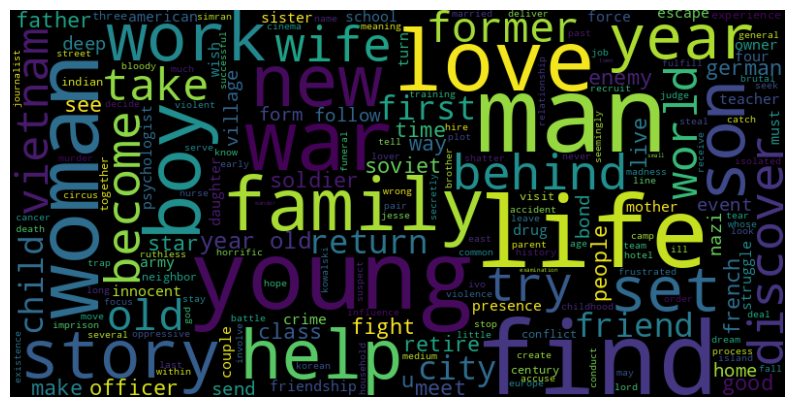

In [56]:
drama_text = ' '.join(drama_overview['Overview'])
wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate(drama_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word cloud  representation for most used words in crime

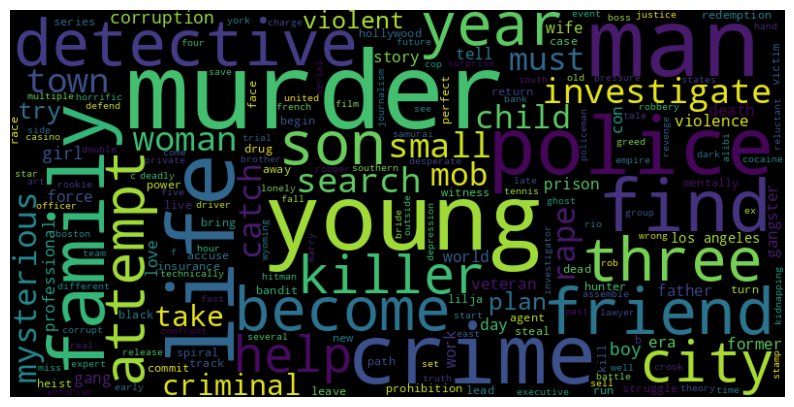

In [57]:
crime_text = ' '.join(crime_overview['Overview'])
wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate(crime_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word cloud  representation for most used words in Family

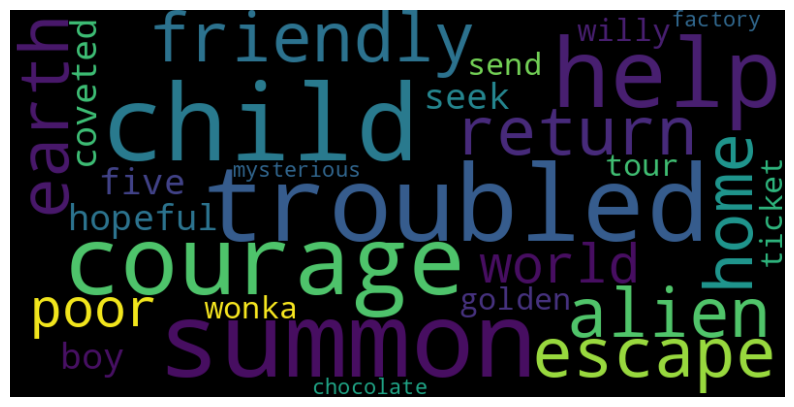

In [58]:
family_text = ' '.join(family_overview['Overview'])
wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate(family_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Part 2: Building a Feedforward Neural Network
## Neural Network Architecture
## Objective:

Build and train a simple feedforward neural network using Keras to classify the text data.
Architecture Details:

Embedding Layer:
Converts word indices into dense feature vectors of shape (vocab_size, 10).
The embedding layer learns these dense representations during training.

Dense Layers (Hidden Layers):
Three dense layers with 100 neurons each and ReLU activation.
These layers capture non-linear patterns in the data.

Output Layer:
Softmax Activation (for multi-class classification): Converts logits into probabilities for each class.
Sigmoid Activation (for binary classification): Converts logits into a probability between 0 and 1.
Compilation and Training

Loss Function:
categorical_crossentropy for multi-class classification.
binary_crossentropy for binary classification.
Optimizer: Adam optimizer for faster convergence.
Training: Train the model for 50 epochs or until an accuracy of 75% is reached.

### 2.1 Model Definition

In [ ]:
# Lowercase the text and preview the data
data = new_df.copy(deep=True)
data['Overview'] = data['Overview'].str.lower()
print("Dataset Head:\n", data.head())
print("\nUnique Genres:", data['Genre'].unique())

# Extract features (text) and labels (genres)
texts = data['Overview'].values
labels = data['Genre'].values

# Encode Labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("\nLabel Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

# Tokenization and text vectorization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')
print(f"\nVocabulary Size: {len(tokenizer.word_index)}")
print(f"Max Sequence Length: {max_len}")

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)


Dataset Head:
     Genre                                           Overview
0   drama  imprison man bond number year find solace even...
1   crime  organize crime dynasty age patriarch transfer ...
2  action  menace know joker wreak havoc chaos people got...
3   crime  early life career vito corleone new york city ...
4   crime  jury holdout attempt prevent miscarriage justi...

Unique Genres: ['drama' 'crime' 'action' 'biography' 'western' 'comedy' 'adventure'
 'animation' 'horror' 'mystery' 'film-noir' 'fantasy' 'family']

Label Mapping: {'action': 0, 'adventure': 1, 'animation': 2, 'biography': 3, 'comedy': 4, 'crime': 5, 'drama': 6, 'family': 7, 'fantasy': 8, 'film-noir': 9, 'horror': 10, 'mystery': 11, 'western': 12}

Vocabulary Size: 3642
Max Sequence Length: 31


### 2.2 Embedding Layer:

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Define the model as per instructions
model = Sequential([
    # Embedding layer with shape (vocab_size, 10)
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=10, input_length=max_len),

    # Flatten the embedding output to feed into dense layers
    Flatten(),

    # Three dense layers with 100 neurons and ReLU activation
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),

    # Output layer for multi-class classification
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1718 - loss: 2.5211 - val_accuracy: 0.1838 - val_loss: 2.2564
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1755 - loss: 2.2190 - val_accuracy: 0.1471 - val_loss: 2.2061
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2050 - loss: 2.0956 - val_accuracy: 0.1250 - val_loss: 2.1630
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2552 - loss: 2.0622 - val_accuracy: 0.1544 - val_loss: 2.1813
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2930 - loss: 1.9744 - val_accuracy: 0.1544 - val_loss: 2.1723
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4363 - loss: 1.7716 - val_accuracy: 0.1765 - val_loss: 2.2316
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5846 - loss: 1.4112 - val_accuracy: 0.1691 - val_loss: 2.3804
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7925 - loss: 1.0468 - val_accuracy: 0.1765 - val_loss

### 2.3 Visualizing Performance:

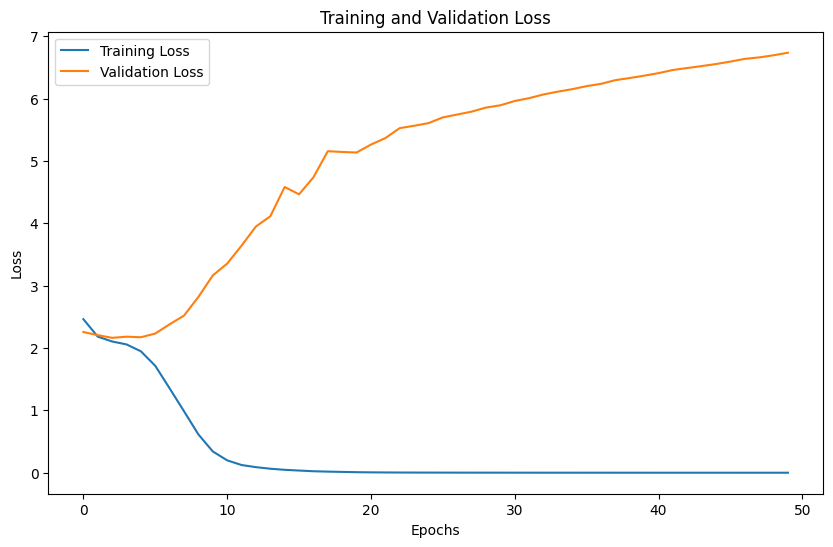

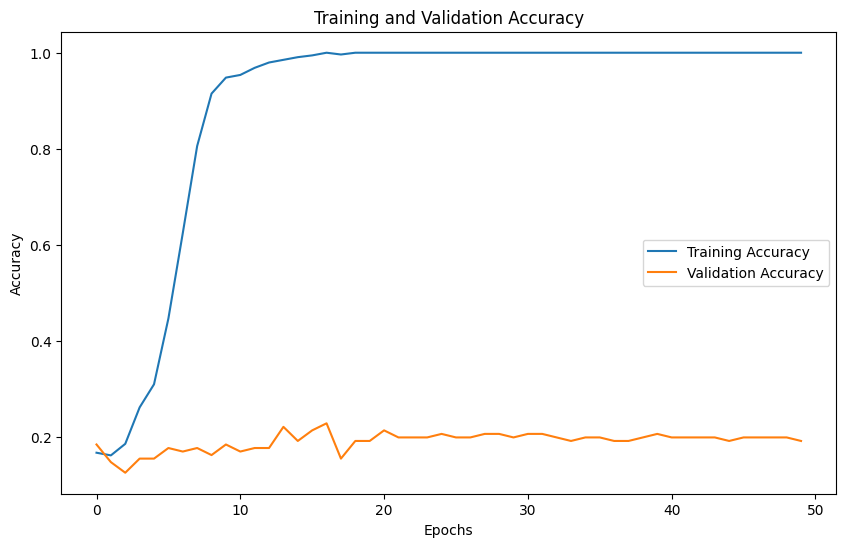

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Part 3:
## Extracting and Visualizing Word Embeddings
Goal:
To extract the learned word embeddings from the embedding layer and visualize them to understand their semantic structure.

Extract Embedding Vectors:

The embedding matrix (shape: (vocab_size, 10)) contains the learned embeddings for all words in the vocabulary.
PCA for Dimensionality Reduction:

The 10D embeddings are reduced to 2D using PCA (Principal Component Analysis) for visualization.
A scatter plot is created to show how semantically similar words (e.g., "adventure" and "discovery") cluster together.


### 3.1 Extract Embedding Vectors



In [ ]:
import numpy as np

# Get the embedding layer weights
embedding_layer = model.layers[0]  # First layer is the embedding layer
embedding_matrix = embedding_layer.get_weights()[0]  # Shape: (vocab_size, embedding_dim)

print(f"Embedding Matrix Shape: {embedding_matrix.shape}")


Embedding Matrix Shape: (3643, 10)


### 3.2 Visualize Embeddings Using PCA

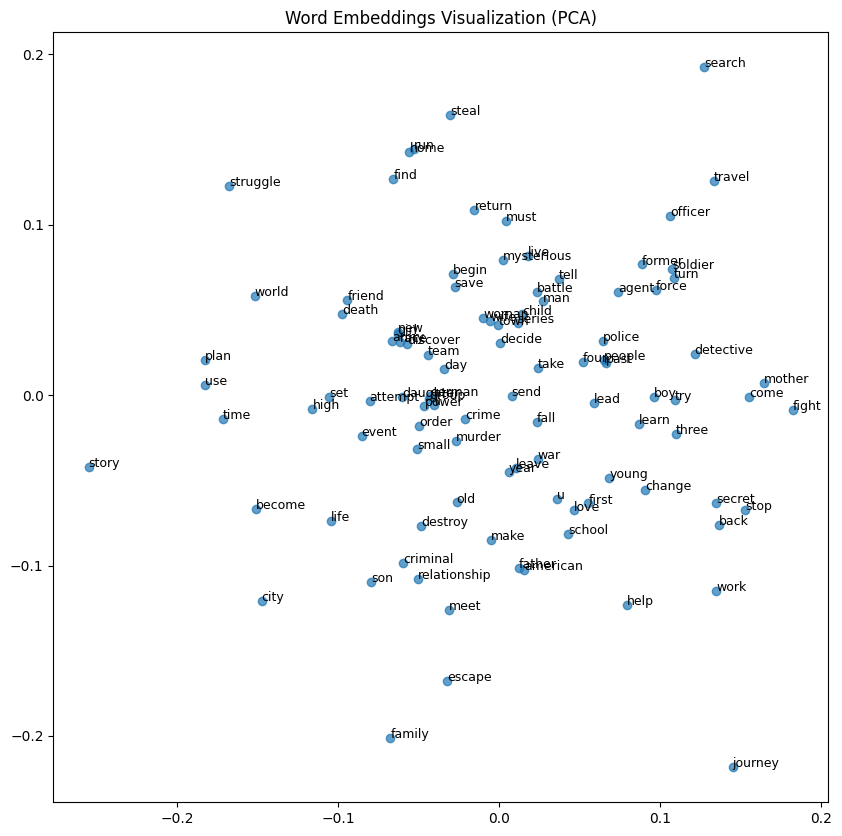

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get the first 100 words for visualization
words_to_plot = list(tokenizer.word_index.keys())[:100]
word_indices = [tokenizer.word_index[word] for word in words_to_plot]

# Get embeddings for the selected words
embeddings_to_plot = embedding_matrix[word_indices]

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_to_plot)

# Scatter plot of the word embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
for i, word in enumerate(words_to_plot):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word, fontsize=9)
plt.title("Word Embeddings Visualization (PCA)")
plt.show()


##  Predict the class for the below given description :

Goal:
To predict the genre of unseen movie descriptions using the trained model.


a.      “A young man who survives a disaster at sea is hurtled into an epic journey of adventure and discovery.”

b.      “Mountain guides Rob Hall and Scott Fischer combine their expedition teams for a final ascent to the summit of Mount Everest. With little warning, a storm strikes the mountain and the climbers must now battle to survive”



Preprocessing:

The new descriptions are tokenized and padded to match the input format of the model.
Prediction:

The model predicts the probability of each genre for the new descriptions.
The class with the highest probability is selected as the predicted genre.



In [ ]:
# New descriptions
descriptions = [
    "A young man who survives a disaster at sea is hurtled into an epic journey of adventure and discovery.",
    "Mountain guides Rob Hall and Scott Fischer combine their expedition teams for a final ascent to the summit of Mount Everest. With little warning, a storm strikes the mountain and the climbers must now battle to survive."
]

# Preprocess descriptions (tokenize and pad)
desc_sequences = tokenizer.texts_to_sequences(descriptions)
desc_padded = pad_sequences(desc_sequences, maxlen=max_len, padding='post')

# Predict classes
predictions = model.predict(desc_padded)
predicted_classes = np.argmax(predictions, axis=1)
predicted_genres = label_encoder.inverse_transform(predicted_classes)

print(f"\nPredicted Genres for Description 1: {predicted_genres[0]}")
print(f"Predicted Genres for Description 2: {predicted_genres[1]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Predicted Genres for Description 1: comedy
Predicted Genres for Description 2: crime


## Cosine similarty:

Goal:
To measure the semantic similarity between pairs of words using their embedding vectors.

Cosine Similarity:

Cosine similarity measures the cosine of the angle between two vectors.
Values close to 1 indicate high similarity, while values close to -1 indicate opposite meanings.
Word Pairs for Comparison:

a.      Adventure,discovery

b.      Stranger,Peculiar

c.      Young,old


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Words to compare
words_to_compare = ['adventure', 'discovery', 'stranger', 'peculiar', 'young', 'old']

# Get indices for the words
word_indices = {word: tokenizer.word_index.get(word, None) for word in words_to_compare}

# Ensure all words are in the vocabulary
if None in word_indices.values():
    missing_words = [word for word, index in word_indices.items() if index is None]
    print(f"The following words are missing in the vocabulary: {missing_words}")

# Get embeddings for the words
word_embeddings = {word: embedding_matrix[word_indices[word]] for word in words_to_compare if word in word_indices}

# Function to calculate cosine similarity between two words
def calculate_cosine_similarity(word1, word2):
    return cosine_similarity([word_embeddings[word1]], [word_embeddings[word2]])[0, 0]

# Calculate cosine similarities
similarities = {
    "Adventure vs Discovery": calculate_cosine_similarity('adventure', 'discovery'),
    "Stranger vs Peculiar": calculate_cosine_similarity('stranger', 'peculiar'),
    "Young vs Old": calculate_cosine_similarity('young', 'old'),
}

print("\nCosine Similarities:")
for pair, similarity in similarities.items():
    print(f"{pair}: {similarity:.4f}")



Cosine Similarities:
Adventure vs Discovery: 0.1915
Stranger vs Peculiar: -0.1031
Young vs Old: 0.0504
